In [1]:
import sys
sys.path.append('../../')

# Libraries
import numpy as np
from oqc.optimal_quantum_control import OptimalQuantumControl, Direct_Fidelity_Estimation, Expected_Value_Pulse, circuit2schedule
from qiskit import IBMQ, transpile
from qiskit.utils import QuantumInstance
from scipy.linalg import expm

# Load the backend
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
backend = provider.get_backend('ibmq_armonk')
# backend = provider.backend.ibmq_armonk

In [2]:
# Define initial parameters
initial_control_params = np.random.random(10)
time_derivative = 64
target_gate = np.array([[0,1], [1, 0]])

# Create the OptimalQuantumControl
control = OptimalQuantumControl(initial_control_params, backend, time_derivative, target_gate)

# Calculate the optimal parameters
optimal = control.control()

2021-10-24 04:07:05,176: optimal_quantum_control: INFO: Optimizing fidelity...
2021-10-24 04:07:05,178: optimal_quantum_control: INFO: Calculating fidelity...
0.6994685993283831
2021-10-24 04:07:05,184: optimal_quantum_control: INFO: Calculating fidelity...
0.699468536217257
2021-10-24 04:07:05,188: optimal_quantum_control: INFO: Calculating fidelity...
0.6994685486939842
2021-10-24 04:07:05,192: optimal_quantum_control: INFO: Calculating fidelity...
0.6994685599863739
2021-10-24 04:07:05,195: optimal_quantum_control: INFO: Calculating fidelity...
0.6994684834658984
2021-10-24 04:07:05,198: optimal_quantum_control: INFO: Calculating fidelity...
0.6994684201054416
2021-10-24 04:07:05,201: optimal_quantum_control: INFO: Calculating fidelity...
0.6994684589286226
2021-10-24 04:07:05,205: optimal_quantum_control: INFO: Calculating fidelity...
0.6994685332101769
2021-10-24 04:07:05,208: optimal_quantum_control: INFO: Calculating fidelity...
0.6994683670707383
2021-10-24 04:07:05,212: optima

In [3]:
# Show the matrix
U_optimal = control.unitary_grape(optimal)
U_optimal = U_optimal*np.conj(U_optimal[0,0])/abs(U_optimal[0,0])
U_optimal

array([[ 0.40904305+0.j        , -0.91250306+0.00468525j],
       [-0.91206834-0.02855053j, -0.40890311-0.01069868j]])

In [4]:
optimal

array([0.98897783, 0.95701667, 0.95701108, 0.92113789, 0.99282421,
       0.95777482, 0.93456134, 1.        , 1.        , 1.        ])

In [5]:
schedule = control.grape_pulse(optimal)

2021-10-24 04:07:07,751: optimal_quantum_control: INFO: Calculating GRAPE pulse...


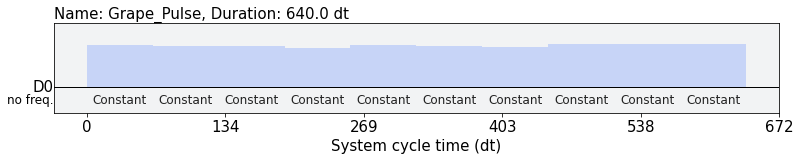

In [6]:
schedule.draw()

In [7]:
Direct_Fidelity_Estimation( schedule, target_gate, 20, backend )

[[0.55249023 0.58093262 0.56604004 0.58203125 0.5604248  0.58068848
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.55957031 0.58288574
  0.55883789 0.56860352 1.         1.         1.         1.
  0.56933594 0.56762695 0.56079102 0.57983398 1.         1.
  1.         1.         1.         1.        ]
 [0.44750977 0.41906738 0.43395996 0.41796875 0.4395752  0.41931152
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.44042969 0.41711426
  0.44116211 0.43139648 0.         0.         0.         0.
  0.43066406 0.43237305 0.43920898 0.42016602 0.         0.
  0.         0.         0.         0.        ]]


0.15575561523437503